In [9]:
n=3000
savedir = 'new_3d/a2_n1_T6_w8/' + str(n)
print(savedir)
####import sdf data#####
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm

import sdf


import scipy.fftpack as fftpack
import numpy as np
#data=sdf.read('data/2800.sdf',dict=True)
#bz=data['Electric Field/Ey'].data[:,:,int(188/2)]
#ne=data['Derived/Number_Density/electron1'].data[:,:,int(188/2)]

Ey=np.loadtxt(savedir+'_ey.txt')
bz=np.loadtxt(savedir+'_bz.txt')
ne=np.loadtxt(savedir+'_ne.txt')

print(Ey.shape)
ne_y0=ne[:,int(188/2)]
Ey_y0=Ey[:,int(188/2)]
hx = fftpack.hilbert(Ey_y0)
hy = np.sqrt(Ey_y0**2+hx**2)

new_3d/a2_n1_T6_w8/3000
(1908, 188)


In [4]:
    Ex=np.loadtxt(savedir+'_ex.txt')
    Ex_y0=Ex[:,int(188/2)]
    #Ey=data["Electric Field/Ey"].data[:,:,int(188/2)]
    Ey=np.loadtxt(savedir+'_ey.txt')
    Ey_y0=Ey[:,int(188/2)]
    k,x,zxx=signal.stft(Ey_y0,fs=2*pi/const.delta_x,nperseg=const.nperseg)
    zxx=abs(zxx)
    zxx.shape

(126, 17)

In [5]:
import numpy
import sdf
import constant as const
import scipy.signal as signal
import numpy as np
pi=3.14
def E_x_y_zxx(a):        
    #sdfdir=const.sdfdir +str(a).zfill(const.filenumber)+".sdf"
    #data=sdf.read(sdfdir,dict=True)
    #Ex=data["Electric Field/Ex"].data[:,:,int(188/2)]
    Ex=np.loadtxt(savedir+'_ex.txt')
    Ex_y0=Ex[:,int(188/2)]
    #Ey=data["Electric Field/Ey"].data[:,:,int(188/2)]
    Ey=np.loadtxt(savedir+'_ey.txt')
    Ey_y0=Ey[:,int(188/2)]
    k,x,zxx=signal.stft(Ey_y0,fs=2*pi/const.delta_x,nperseg=const.nperseg)
    zxx=abs(zxx)
    index = np.unravel_index(zxx.argmax(),zxx.shape)
    k_x=np.ones(const.Nx)*k[index[0]]
    for i in range(0,const.Nx):
        x=i
        #print(x)
        a=zxx[:,int(x/const.nperseg)]
        a=a.tolist()
        a[0]=0
        max_index=a.index(max(a))
        if max(a) > 0.2 * zxx[index[0]][index[1]]:
            k_x[i]=(k[max_index])
    #ne=data['Derived/Number_Density/electron1'].data
    ne=np.loadtxt(savedir+'_ne.txt')
    ne_y0=ne[:,int(const.Ny/2)]#,int(const.Ny/2)]

    return [Ex_y0,Ey_y0,zxx,ne_y0,k_x]
def k(x,zxx):
    a=zxx[:,int(x/const.nperseg)]
    a=a.tolist()
    a[0]=0
    max_index=a.index(max(a))
    # index=(max_index*pi)/(len(a)*const.delta_x)
    index =  (pi/const.delta_x)/len(a) * max_index
    #print "max(k_x),max_index,len(k_x),index",max(a),max_index,len(a),index # ,index
    return index
def scalar_p(Ex_y0):
    scalar_p=0
    e=1.6e-19
    c=3e8
    m0=9.1e-31
    import constant as const
    a=np.zeros(const.Nx)
    x=const.Nx - 1
    for i in range(0,x+1):
        scalar_p=Ex_y0[x-i]*const.delta_x+scalar_p 
    #a.append(e*scalar_p/(m0*c**2))   
        a[x-i]=e*scalar_p/(m0*c**2)  
    #   print  'n_scalar',a
    return a
def wp_2(x,ne_y0):
    ne=ne_y0[x]
    #ne=1e25
    e=1.6e-19
    m0=9.1e-31
#print "ne",ne
    w_p_2=ne*e**2/(m0*8.85e-12)
#print "w_p",w_p_2
    return w_p_2
def ref_index(x,Ex_y0,Ey_y0,zxx,ne_y0,k_x):
    c=3e8
    wp_x_2=wp_2(x,ne_y0)
#print "wp^2",wp_x_2
#p_y0=scalar_p(Ex_y0)
    p_y0_x=p_y0[x]
#print "scalar",p_y0_x
#k_x=k(x,zxx)
    k_x=k_x[x]
    w0=k_x*c/1
#print "w0",w0
    a=wp_x_2/(1+p_y0_x)
    b=(k_x*c)**2
    c=-(k_x*c)**2
    #print("a,b,c",a,b,c)
    result=np.roots([a,b,c])
    #print(result)
    return np.roots([a,b,c])
def ref_a(a):   
    ref=[]
    Ex_y0,Ey_y0,zxx,ne_y0,k_x=E_x_y_zxx(a)
    x=const.Nx
    global p_y0
    p_y0=scalar_p(Ex_y0)
    for i in range(0,const.Nx):
        index=ref_index(i,Ex_y0,Ey_y0,zxx,ne_y0,k_x)
        #print("c",c)
        s_a= type(index) == numpy.ndarray
        #print("type",a)
        if type(index) == numpy.ndarray:
            index=index[-1]
        #print("c[-1]",c)
        ref.append(index)
    #print("ref:",type(ref[0]))
    return ref
#def help():
#print "func.ref_a(a)"
#print "a,x=1,1"
#print "Ex_y0,Ey_y0,zxx,ne_y0,k_x=func.E_x_y_zxx(a)"
#print "global p_y0"
#print "func.p_y0=scalar_p(Ex_y0)"    
#print "func.ref_index(x,Ex_y0,Ey_y0,zxx,ne_y0)"
c=3e8
'''
x=2
Ex_y0,Ey_y0,zxx,ne_y0,k_x=E_x_y_zxx(2800)
print(zxx)
wp_x_2=wp_2(x,ne_y0)
#print(wp_x_2)
#print "wp^2",wp_x_2
#p_y0=scalar_p(Ex_y0)
p_y0_x=p_y0[x]
#print(p_y0_x)
#print "scalar",p_y0_x
#k_x=k(x,zxx)
k_x=k_x[x]
#print(k_x)
w0=k_x*c/1
#print "w0",w0
a=wp_x_2/(1+p_y0_x)
#print('a',a)
'''
x_ref=ref_a(2800)
x_ref=np.array(x_ref)
print(x_ref)

[0.99805191 0.99674878 0.98897967 ... 0.98623838 0.98902731 0.98966326]


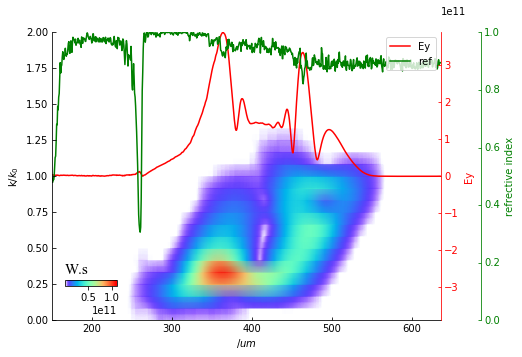

In [6]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6

fig = plt.figure(1) 
#ax_cof = fig.add_subplot(121)

#fig = plt.figure(figsize=[9,6]) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0,0.9,1])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

#set label for axis
ax_cof.set_ylabel('k/${k_0}$')
ax_cof.set_xlabel('${/um}$')
ax_temp.set_ylabel('Ey')
ax_load.set_ylabel('refrective index')
#ax_cp.set_ylabel('k/${k_0}$')
#ax_wear.set_ylabel('Wear')

load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))

#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

k0=2*3.14/const.lamada
k1=2*3.14/1e-6
fs=2*3.14/const.delta_x/k0
f,t,zxx=signal.stft(Ey_y0,fs=2*3.14/const.delta_x,nperseg=200,noverlap=199)

plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256/5))-1.1))))
cmap = plt.get_cmap()

name='${e_k}$  '

curve_cof= ax_cof.pcolormesh(t*2*3.14/1e-6,f/k0,np.abs(zxx),cmap=cmap,shading='gouraud')


curve_temp= ax_temp.plot(np.linspace(0,60*10.6,1000),hy, label="Ey", color='red')
curve_load= ax_load.plot(np.linspace(0,60*10.6,1000),x_ref, label="ref", color='green')

ax_cp.set_ylim((0,2))



#ax_cof.set_ylim((-ne_y0.max(),ne_y0.max()))
ax_temp.set_ylim((-hy.max(),hy.max()))
ax_load.set_ylim((0,1))
ax_cof.set_ylim((0,2))


ax_cof.legend()

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
#ax_cp.axis['right3'].label.set_color('pink')
#ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
#ax_cp.axis['right3'].major_ticks.set_color('pink')
#ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
#ax_cp.axis['right3'].major_ticklabels.set_color('pink')
#ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
#ax_cp.axis['right3'].line.set_color('pink')
#ax_wear.axis['right4'].line.set_color('blue')

position=fig.add_axes([0.030, 0.12, 0.12, 0.02])#位置[左,下,右,上]
cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
cb.ax.set_title('W.s', loc = 'left', fontdict=font)
#cb.ax.tick_params(labelsize=15)
#plt.tight_layout()
ax_cof.set_xlim((150,636))
plt.show()
fig.savefig('fig/'+str(n)+'_fig3a.png',dpi=400,bbox_inches = 'tight')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


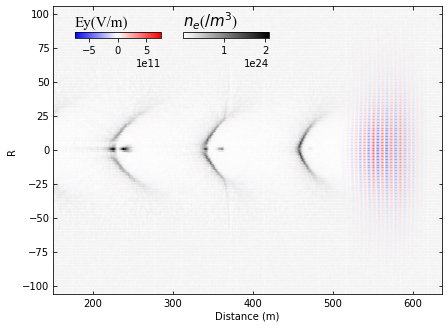

In [25]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 2



fig = plt.figure(1) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0, 0.9, 1])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)

#append axes

ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)



#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(True)
ax_cof.axis['top'].set_visible(True)
ax_temp.axis['right'].set_visible(False)
ax_temp.axis['right'].major_ticklabels.set_visible(False)
ax_temp.axis['right'].label.set_visible(False)

#set label for axis
ax_cof.set_ylabel('R')
ax_cof.set_xlabel('Distance (m)')

#ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))
#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)
###################
########plot########
###################
plt.set_cmap(reg_cmap_transparent('bwr',create_alpha(lambda x:(abs(x/127.5-1)**index))))
cmap1 = plt.get_cmap()
plt.set_cmap(reg_cmap_transparent('binary',create_alpha(lambda x:(np.exp(x/(256))-0.8))))

cmap2 = plt.get_cmap()
name='${e_k}$  '

x=np.linspace(0,60*10.6,1000)
r=np.linspace(-10*10.6,10*10.6,188)
X,R=np.meshgrid(x,r)

curve_cof= ax_cof.pcolormesh(X,R,Ey.T,cmap=cm.bwr)
curve_temp= ax_temp.pcolormesh(X,R,ne.T,cmap=cmap2)

curve_cof.set_clim((-Ey.max(),Ey.max()))

position=fig.add_axes([0.05, 0.89, 0.2, 0.02])#位置[左,下,右,上]
cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
#cb.set_label('Ey(V/m)',fontdict=font)
#cb.ax.tick_params(labelsize=15)
cb.ax.set_title('Ey(V/m)', loc = 'left', fontdict=font)
position2=fig.add_axes([0.3, 0.89, 0.2, 0.02])#位置[左,下,右,上]
cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
cb2.ax.set_title('${n_e}$(${/m^3}$)', loc = 'left',fontdict=font)
#cb2.set_label('n_e(/m^3)',fontdict=font)
#cb2.ax.tick_params(labelsize=15)

ax_cof.tick_params(labelsize=15)
labels = ax_cof.get_xticklabels() + ax_cof.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
plt.tight_layout()


####################################################
ax_cof.set_xlim((150,636))
plt.show()
#fig.savefig('test2.png',dpi=400,bbox_inches = 'tight')
fig.savefig('fig/'+str(n)+'_fig3b.png',dpi=400,bbox_inches = 'tight')

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01670007 0.01670007 0.01670007 ... 0.01670007 0.01670007 0.01670007]
 [0.03340013 0.03340013 0.03340013 ... 0.03340013 0.03340013 0.03340013]
 ...
 [8.2999332  8.2999332  8.2999332  ... 8.2999332  8.2999332  8.2999332 ]
 [8.31663327 8.31663327 8.31663327 ... 8.31663327 8.31663327 8.31663327]
 [8.33333333 8.33333333 8.33333333 ... 8.33333333 8.33333333 8.33333333]]


<Figure size 432x288 with 0 Axes>

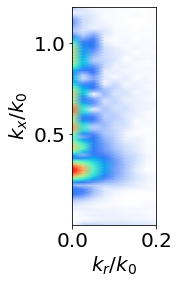

In [35]:
import constant as const
iname = 'rainbow'
def reg_cmap():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.15        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = plt.get_cmap(iname)
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

cmap=reg_cmap()
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]

def a(x):
    if x>10:
        return x
plt.set_cmap(reg_cmap_transparent(iname,create_alpha(lambda x:(np.exp(x/(256))-0.8))))
cmap1 = plt.get_cmap()


font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20,  
        } 
k0=2*3.14/10.6e-6
k1=2*3.14/1e-6
fs_x=2*3.14/const.delta_x/k0

fs_r=2*3.14/(40*10.6e-6/188)/k0

x=np.linspace(0,fs_x/2,int(1000/2))
r=np.linspace(0,fs_r/2,int(188/2))
R,X=np.meshgrid(r,x)
fig,ax=plt.subplots(figsize=(1.5,4))
#ax.set_xlim=((0,2))
#ax.set_ylim=((0,1))
k_bz2d=np.fft.fft2(bz)
#print(k_bz2d.shape)
np.savetxt('txt/'+str(n)+'_fuliye2d.txt',k_bz2d)

im4=ax.pcolormesh(R,X,abs(k_bz2d[:int(const.Nx/2),:int(const.Ny/2)]),cmap=cmap,shading='gouraud')
#ax.set_xlim=((0,R[0,1]))
#ax.set_ylim=((0,X[0,1]))

#plt.colorbar(im4)

###
plt.yticks([0.5,1])

###
axes = plt.gca()
axes.set_xlim([0,0.2])
axes.set_ylim([0,1.2])
ax.tick_params('both',labelsize=20)
ax.set_xlabel('${k_r}/{k_0}$',fontdict=font)
ax.set_ylabel('${k_x}/{k_0}$',fontdict=font)

print(X)
plt.show()
fig.savefig('fig/'+str(n)+'_fig2d.png',dpi=400,bbox_inches = 'tight')

In [5]:
I=R*1j+X

In [7]:
import cmath

a=cmath.polar()

TypeError: only length-1 arrays can be converted to Python scalars

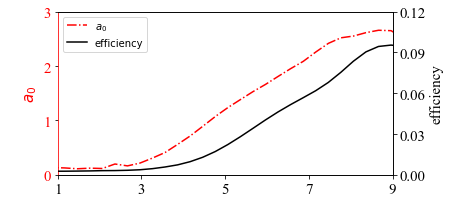

In [28]:
#color=np.loadtxt('plot3d/ek.txt')
###
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        } 
name='${e_k}$  '
#fig = plt.figure(1)#figsize=(18,6))
#ax = fig.add_subplot(111)
fig,ax=plt.subplots(figsize=(6,3))
ax2=ax.twinx()
#im=ax.scatter(x,r,s=0.01,c=color,cmap=cm.rainbow)
#cbar=fig.colorbar(im,ax=ax)
####

name='${e_k}$  '
####
a0_1=np.loadtxt('txt/2d/a0.txt')
a0_d1=np.loadtxt('txt/2d/a0_distance.txt')
a0_2=np.loadtxt('txt/a2_n1_T6_w8/a0.txt')
a0_d2=np.loadtxt('txt/a2_n1_T6_w8/a0_distance.txt')
eff_1=np.loadtxt('txt/2d/eff.txt')
eff_d1=np.loadtxt('txt/2d/eff_locate.txt')
eff_2=np.loadtxt('txt/a2_n1_T6_w8/eff.txt')
eff_d2=np.loadtxt('txt/a2_n1_T6_w8/eff_locate.txt')

a0_d2=a0_d2[::100]
a0_2=a0_2[::100]

curve_cof, = ax.plot(a0_d2, a0_2,'r-.',label="${a_0}$")#, color='black')
#scatter_cof = ax.plot(a0_d2, a0_2, 'r-.',label="eff_2d")#, color='blue')
curve_temp, = ax2.plot(eff_d2, eff_2,color='black',label="efficiency")#, color='red')
#curve_load, = ax2.plot(eff_d2, eff_2,color='black',label="eff_3d")#, color='green')

#position=fig.add_axes([0.15, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
#cb.set_label('Ey(V/m)',fontdict=font)
#position2=fig.add_axes([0.45, 0.85, 0.28, 0.02])#位置[左,下,右,上]
#cb2=plt.colorbar(curve_temp,cax=position2,orientation='horizontal')#方向
#cb2.set_label('n_e(/m^3)',fontdict=font)

###
plt.xticks([1000,3000,5000,7000,9000])
ax2.yaxis.set_major_locator( MultipleLocator(0.03) )
#ax.xaxis.set_major_locator(MultipleLocator(1000) )
ax.xaxis.set_major_formatter( FuncFormatter( x_formatter ) )

###
ax.set_xlim((1000,9000))
ax.set_ylim((0,3))
ax2.set_ylim((0,0.12))
#ax.set_xlabel('X'+ '[$\mu m$]',fontdict=font)
ax.set_ylabel('\n${a_0}$',fontdict=font,color='r')

ax2.set_ylabel('efficiency',fontdict=font)
#cbar.ax.tick_params(labelsize=15)
#im.set_clim([0,600])

ax.tick_params('both',labelsize=15)

#ax.tick_params(fontdict=font)#labelsize=15)
ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]

plt.legend(handles=[curve_cof,curve_temp])
#ax2.legend()

####
#ax.spines['top'].set_color(None)
#ax2.spines['top'].set_color(None)
ax.spines['left'].set_color('red')
ax2.spines['left'].set_color(None)
####
for tl in ax.get_yticklabels():
    tl.set_color('r')

plt.show()
fig.savefig('fig/3d_r.png',dpi=400,bbox_inches = 'tight')





108
10199.532000000001 0.636


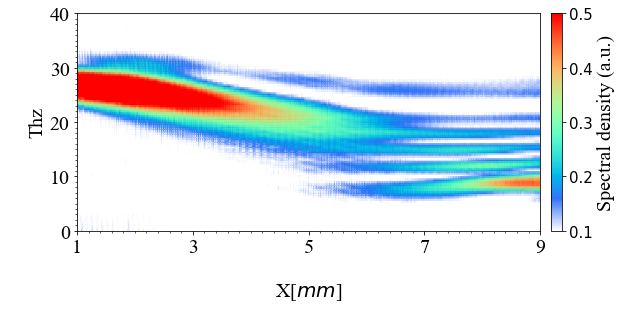

In [1]:
# -- coding: utf-8 --
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import sdf
import matplotlib.pyplot as pl
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import MultipleLocator, FuncFormatter
import constant as const
%matplotlib inline
#plt.switch_backend('agg')
load_dir="txt/a2_n1_T6_w8/xf.txt"
xf=np.loadtxt(load_dir)
savedir="txt/a2_n1_T6_w8/freqs.jpg"
#constant
c       =  3e8
micron  =  1e-6
lamada  =  const.lamada #10.6 * micron 
gridnumber = 1000      #2400
stop    =  3400      #5889
dt_snapshot= 10e-15      #9e-15
dt      =  dt_snapshot*1e15      #fs
x_max   = 60*10.6e-6       #80 * lamada   #60 * lamada #micron
x_min   =  0 * micron
x_end   =  x_max - x_min 
window_start_time =  (x_max - x_min) / c
delta_x =  x_end/gridnumber
t_end   =  stop * dt_snapshot
x_interval=const.x_interval        #10
t_total=1e15*x_end/c         #fs
t_size=t_total/(dt_snapshot*1e15)+1+1           #t_grid_number
######t_size=int(1e15*gridnumber*delta_x/c)+1

if t_end-window_start_time<0:
      xgrid   =  int(gridnumber)
else:
      xgrid   =  int(gridnumber + c*(t_end-window_start_time)/delta_x)
#######

def reg_cmap():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.15        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = plt.get_cmap(iname)
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    #print(colors)
    #colors[0] = [1,1,1,1]
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap


def reg_cmap2():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.1        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = cmap2
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    #print(colors)
    colors[0] = [1,1,1,1]
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

cmap=reg_cmap()

#cmap2=reg_cmap()
#cmap=reg_cmap2()

def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
#plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256*2))-1.05))))
#cmap = plt.get_cmap()
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20,  
        }  
color='rainbow'
index = 2 
#####fft freqs

N0 = t_size
T=t_size*dt             #fs  #dt_snapshot*1e15  #t[x][t_size-1]-t[x][0]
fs=N0*1e3/T
freqs=np.linspace(0,fs/2,int(N0/2)+1)
print(len(freqs))
######
for i in range(0,len(freqs)):
     if freqs[i] > 50:
        index = i
        break;

#freqs=freqs[0:index]

################freqs=np.linspace(0,500,101)
#####time profile
t=np.arange(0,t_size+dt,dt)


#####


#####set x ,y         
print(xgrid*delta_x*1e6/x_interval,delta_x*1e6)
#x=np.arange(int(xgrid*delta_x*1e6/x_interval)+1,delta_x*1e6)
x=np.linspace(0,xgrid*delta_x*1e6/x_interval,int(xgrid/x_interval+1))

#a=float("inf")
#freqs[0]=a
#light=3e8*np.ones(freqs.shape)
#lam=(light/(freqs*1e12))*1e6
X,Freqs=np.meshgrid(x,freqs)
#lamda[1]=0
#lamda[0]=0
#lamda[2]=0
#lamda[3]=0

####transition Xf
Xf=xf.T
#plot

#print(x[::10].shape,freqs,Xf[:,::10])

f = interpolate.interp2d(x[::100],freqs,Xf[:,::100], kind='cubic')

x_new=np.linspace(0,xgrid*delta_x*1e6/x_interval,3000)
freqs_new=np.linspace(0,fs/2,1000)

X_new,Freqs_new=np.meshgrid(x_new,freqs_new)

zz=f(x_new,freqs_new)

###
fig,ax=plt.subplots(figsize=(10,4))
###
#Xf=Xf[0:index,...]
###

Xf=Xf/9e12

zz=zz/zz.max()

#im=ax.pcolormesh(X_new,Freqs_new,zz,cmap=cmap)#,shading='gouraud')
im=ax.pcolormesh(X,Freqs,Xf,cmap=cmap,shading='gouraud')
#im=ax.pcolormesh(X,Freqs,Xf,cmap=plt.get_cmap('rainbow'),shading='gouraud')
#cbar=fig.colorbar(im,ax=ax)
cbar=plt.colorbar(im,pad=0.02)
#fig.savefig('Xf.png',dpi=200)
#set ticker

def x_formatter(x, pos):
        #a=delta_x*x*x_interval*1e6
        a=x/1000
        return  "%d"%int(a)
def freqs_formatter(x, pos):
          
        return  "%d"%int(x)
x_major_locator=int(xgrid/x_interval/5)
x_minor_locator=int(xgrid/x_interval/50)

#y_tick_pos  = np.linspace(0,40,1)
#ax.set_yticks(y_tick_pos)
######
#ax.set_yscale("symlog",basey=2)
#ax.set_xlim((0,2000))

#ax.xaxis.set_major_locator(MultipleLocator(1000))
plt.xticks([1000,3000,5000,7000,9000])
ax.xaxis.set_major_formatter( FuncFormatter( x_formatter ))


#ax.xaxis.set_minor_locator( MultipleLocator(x_minor_locator) )


ax.xaxis.set_minor_locator( MultipleLocator(200) )
ax.yaxis.set_minor_locator( MultipleLocator(1) )
#formatter0 = EngFormatter(unit='THz')
#ax.yaxis.set_major_formatter(formatter0)
ax.yaxis.set_major_formatter( FuncFormatter( freqs_formatter ) )
#ax.set_xlabel('um')
#ax.set_ylabel('Thz')
#ax.set_xlim((0,10000))

ax.set_xlabel('\nX'+ '[$mm$]',fontdict=font)
ax.set_ylabel('\nThz',fontdict=font)
ax.set_xlim((1000,9000))
ax.set_ylim((0,40))

cbar.ax.tick_params(labelsize=15)
cbar.set_label('Spectral density (a.u.)',fontdict=font)
#cbar.ax.set_title('\n\nEy(V/m)')#,fontdict=font)


#im.set_clim([0,600])
ax.tick_params('both',labelsize=20)


#ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()# + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]




im.set_clim([0.1,0.5])
#print and save
#plt.show()
fig.savefig(savedir,dpi=200,bbox_inches = 'tight')
plt.show()

108
10499.666666666668 0.33333333333333337


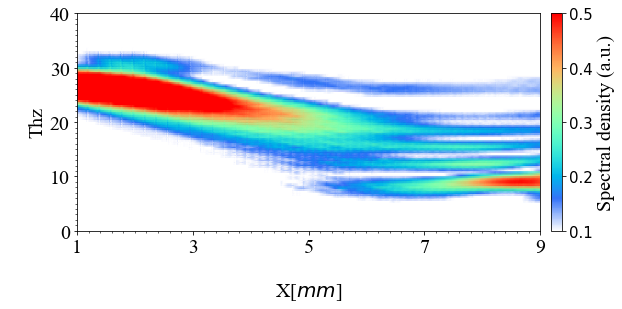

In [9]:
# -- coding: utf-8 --
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import sdf
import matplotlib.pyplot as pl
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import MultipleLocator, FuncFormatter
import constant as const
%matplotlib inline
#plt.switch_backend('agg')
load_dir="txt/new_thz/xf.txt"
xf=np.loadtxt(load_dir)
savedir="txt/new_thz/freqs.jpg"
#constant
c       =  3e8
micron  =  1e-6
lamada  =  const.lamada #10.6 * micron 
gridnumber = 1908      #2400
stop    =  3500      #5889
dt_snapshot= 10e-15      #9e-15
dt      =  dt_snapshot*1e15      #fs
x_max   = 60*10.6e-6       #80 * lamada   #60 * lamada #micron
x_min   =  0 * micron
x_end   =  x_max - x_min 
window_start_time =  (x_max - x_min) / c
delta_x =  x_end/gridnumber
t_end   =  stop * dt_snapshot
x_interval=const.x_interval        #10
t_total=1e15*x_end/c         #fs
t_size=t_total/(dt_snapshot*1e15)+1+1           #t_grid_number
######t_size=int(1e15*gridnumber*delta_x/c)+1

if t_end-window_start_time<0:
      xgrid   =  int(gridnumber)
else:
      xgrid   =  int(gridnumber + c*(t_end-window_start_time)/delta_x)
#######

def reg_cmap():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.15        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = plt.get_cmap(iname)
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    #print(colors)
    #colors[0] = [1,1,1,1]
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap


def reg_cmap2():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.1        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = cmap2
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    #print(colors)
    colors[0] = [1,1,1,1]
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

cmap=reg_cmap()

#cmap2=reg_cmap()
#cmap=reg_cmap2()

def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
#plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256*2))-1.05))))
#cmap = plt.get_cmap()
font = {'family' : 'Times New Roman',
        'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20,  
        }  
color='rainbow'
index = 2 
#####fft freqs

N0 = t_size
T=t_size*dt             #fs  #dt_snapshot*1e15  #t[x][t_size-1]-t[x][0]
fs=N0*1e3/T
freqs=np.linspace(0,fs/2,int(N0/2)+1)
print(len(freqs))
######
for i in range(0,len(freqs)):
     if freqs[i] > 50:
        index = i
        break;

#freqs=freqs[0:index]

################freqs=np.linspace(0,500,101)
#####time profile
t=np.arange(0,t_size+dt,dt)


#####


#####set x ,y         
print(xgrid*delta_x*1e6/x_interval,delta_x*1e6)
#x=np.arange(int(xgrid*delta_x*1e6/x_interval)+1,delta_x*1e6)
x=np.linspace(0,xgrid*delta_x*1e6/x_interval,int(xgrid/x_interval+1+1))

#a=float("inf")
#freqs[0]=a
#light=3e8*np.ones(freqs.shape)
#lam=(light/(freqs*1e12))*1e6
X,Freqs=np.meshgrid(x,freqs)
#lamda[1]=0
#lamda[0]=0
#lamda[2]=0
#lamda[3]=0

####transition Xf
Xf=xf.T
#plot

#print(x[::10].shape,freqs,Xf[:,::10])

#f = interpolate.interp2d(x[::100],freqs,Xf[:,::100], kind='cubic')

x_new=np.linspace(0,xgrid*delta_x*1e6/x_interval,3000)
freqs_new=np.linspace(0,fs/2,1000)

X_new,Freqs_new=np.meshgrid(x_new,freqs_new)

#zz=f(x_new,freqs_new)

###
fig,ax=plt.subplots(figsize=(10,4))
###
#Xf=Xf[0:index,...]
###

Xf=Xf/Xf.max()

#zz=zz/zz.max()

#im=ax.pcolormesh(X_new,Freqs_new,zz,cmap=cmap)#,shading='gouraud')
im=ax.pcolormesh(X,Freqs,Xf,cmap=cmap,shading='gouraud')
#im=ax.pcolormesh(X,Freqs,Xf,cmap=plt.get_cmap('rainbow'),shading='gouraud')
#cbar=fig.colorbar(im,ax=ax)
cbar=plt.colorbar(im,pad=0.02)
#fig.savefig('Xf.png',dpi=200)
#set ticker

def x_formatter(x, pos):
        #a=delta_x*x*x_interval*1e6
        a=x/1000
        return  "%d"%int(a)
def freqs_formatter(x, pos):
          
        return  "%d"%int(x)
x_major_locator=int(xgrid/x_interval/5)
x_minor_locator=int(xgrid/x_interval/50)

#y_tick_pos  = np.linspace(0,40,1)
#ax.set_yticks(y_tick_pos)
######
#ax.set_yscale("symlog",basey=2)
#ax.set_xlim((0,2000))

#ax.xaxis.set_major_locator(MultipleLocator(1000))
plt.xticks([1000,3000,5000,7000,9000])
ax.xaxis.set_major_formatter( FuncFormatter( x_formatter ))


#ax.xaxis.set_minor_locator( MultipleLocator(x_minor_locator) )


ax.xaxis.set_minor_locator( MultipleLocator(200) )
ax.yaxis.set_minor_locator( MultipleLocator(1) )
#formatter0 = EngFormatter(unit='THz')
#ax.yaxis.set_major_formatter(formatter0)
ax.yaxis.set_major_formatter( FuncFormatter( freqs_formatter ) )
#ax.set_xlabel('um')
#ax.set_ylabel('Thz')
#ax.set_xlim((0,10000))

ax.set_xlabel('\nX'+ '[$mm$]',fontdict=font)
ax.set_ylabel('\nThz',fontdict=font)
ax.set_xlim((1000,9000))
ax.set_ylim((0,40))

cbar.ax.tick_params(labelsize=15)
cbar.set_label('Spectral density (a.u.)',fontdict=font)
#cbar.ax.set_title('\n\nEy(V/m)')#,fontdict=font)


#im.set_clim([0,600])
ax.tick_params('both',labelsize=20)


#ax2.tick_params(labelsize=15)
labels = ax.get_xticklabels() + ax.get_yticklabels()# + ax2.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]




im.set_clim([0.1,0.5])
#print and save
#plt.show()
fig.savefig(savedir,dpi=200,bbox_inches = 'tight')
plt.show()

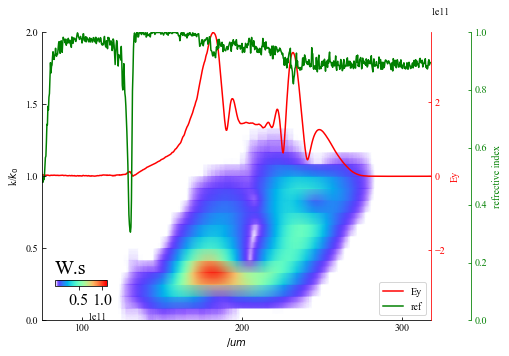

In [36]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import cm
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        #'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 20,  
        }  
color='rainbow'
index = 6

#fig = plt.figure(1) 
fig = plt.figure() 
#ax_cof = fig.add_subplot(121)

#fig = plt.figure(figsize=[9,6]) #定义figure，（1）中的1是什么
ax_cof = HostAxes(fig, [0, 0,0.9,1])  #用[left, bottom, weight, height]的方式定义axes，0 <= l,b,w,h <= 1

####
ax_cof.set_xticks([200,400,600])#,fontdict=font)
ax_cof.set_xticklabels(['400','500','600'],fontdict=font)
####




#parasite addtional axes, share x
ax_temp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_load = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_cp = ParasiteAxes(ax_cof, sharex=ax_cof)
ax_wear = ParasiteAxes(ax_cof, sharex=ax_cof)
########

#append axes
ax_cof.parasites.append(ax_temp)
ax_cof.parasites.append(ax_load)
ax_cof.parasites.append(ax_cp)
ax_cof.parasites.append(ax_wear)

########

#invisible right axis of ax_cof
ax_cof.axis['right'].set_visible(False)
ax_cof.axis['top'].set_visible(False)
ax_temp.axis['right'].set_visible(True)
ax_temp.axis['right'].major_ticklabels.set_visible(True)
ax_temp.axis['right'].label.set_visible(True)

######



#set label for axis
ax_cof.set_ylabel('k/${k_0}$',fontdict=font)
ax_cof.set_xlabel('${/um}$')
ax_temp.set_ylabel('Ey')
ax_load.set_ylabel('refrective index')
#ax_cp.set_ylabel('k/${k_0}$')
#ax_wear.set_ylabel('Wear')

#set size
ax_cof.tick_params('both',labelsize=20)
ax_temp.tick_params('both',labelsize=20)
ax_load.tick_params('both',labelsize=20)



##


load_axisline = ax_load.get_grid_helper().new_fixed_axis
cp_axisline = ax_cp.get_grid_helper().new_fixed_axis
wear_axisline = ax_wear.get_grid_helper().new_fixed_axis

ax_load.axis['right2'] = load_axisline(loc='right', axes=ax_load, offset=(40,0))

#ax_cp.axis['right3'] = cp_axisline(loc='right', axes=ax_cp, offset=(80,0))
#ax_wear.axis['right4'] = wear_axisline(loc='right', axes=ax_wear, offset=(120,0))

fig.add_axes(ax_cof)

k0=2*3.14/const.lamada
k1=2*3.14/1e-6
fs=2*3.14/const.delta_x/k0
f,t,zxx=signal.stft(Ey_y0,fs=2*3.14/const.delta_x,nperseg=200,noverlap=199)



plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256/5))-1.1))))
cmap = plt.get_cmap()

name='${e_k}$  '

curve_cof= ax_cof.pcolormesh(t*2*3.14/1e-6,f/k0,np.abs(zxx),cmap=cmap,shading='gouraud')
ax=plt.gca()
ax.set_xticks([200,400,600])#,fontdict=font)
ax.set_xticklabels(['400','500','600'],fontdict=font)


curve_temp= ax_temp.plot(np.linspace(0,60*10.6,1000),hy, label="Ey", color='red')
curve_load= ax_load.plot(np.linspace(0,60*10.6,1000),x_ref, label="ref", color='green')

ax_cp.set_ylim((0,2))



#ax_cof.set_ylim((-ne_y0.max(),ne_y0.max()))
ax_temp.set_ylim((-hy.max(),hy.max()))
ax_load.set_ylim((0,1))
ax_cof.set_ylim((0,2))


ax_cof.legend(loc='lower right')#,labelcolor=['black','red'])

#轴名称，刻度值的颜色
#ax_cof.axis['left'].label.set_color(ax_cof.get_color())
ax_temp.axis['right'].label.set_color('red')
ax_load.axis['right2'].label.set_color('green')
#ax_cp.axis['right3'].label.set_color('pink')
#ax_wear.axis['right4'].label.set_color('blue')

ax_temp.axis['right'].major_ticks.set_color('red')
ax_load.axis['right2'].major_ticks.set_color('green')
#ax_cp.axis['right3'].major_ticks.set_color('pink')
#ax_wear.axis['right4'].major_ticks.set_color('blue')

ax_temp.axis['right'].major_ticklabels.set_color('red')
ax_load.axis['right2'].major_ticklabels.set_color('green')
#ax_cp.axis['right3'].major_ticklabels.set_color('pink')
#ax_wear.axis['right4'].major_ticklabels.set_color('blue')

ax_temp.axis['right'].line.set_color('red')
ax_load.axis['right2'].line.set_color('green')
#ax_cp.axis['right3'].line.set_color('pink')
#ax_wear.axis['right4'].line.set_color('blue')

position=fig.add_axes([0.030, 0.12, 0.12, 0.02])#位置[左,下,右,上]
cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
cb.ax.set_title('W.s', loc = 'left', fontdict=font)
cb.ax.tick_params(labelsize=15)
#plt.tight_layout()
ax_cof.set_xlim((150,636))

plt.xticks(fontproperties = 'Times New Roman',size=15)
plt.yticks(fontproperties = 'Times New Roman',size=15)
#ax_cof.set_xlabel('x',fontsize=30)
#ax_cof.set_ylabel('y',fontsize=30)
plt.tick_params(axis='both', which='major', labelsize=16)
####
ax_cof.xaxis.set_ticklabels(['100','200','300'],size=30)
ax_temp.xaxis.set_ticklabels(['100','200','300'],size=30)
ax_load.xaxis.set_ticklabels(['100','200','300'],size=30)
ax_cp.xaxis.set_ticklabels(['100','200','300'],size=30)
ax_wear.xaxis.set_ticklabels(['100','200','300'],size=30)
ax_cof.yaxis.label.set_size(40)
####
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
####
import matplotlib
matplotlib.rc('font', **font)
plt.show()
fig.savefig('fig/'+str(n)+'_fig3a.png',dpi=160,bbox_inches = 'tight')

max: 4040740054526.6963


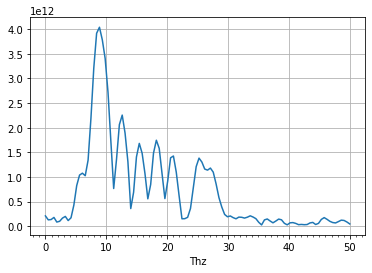

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import sdf
import matplotlib.pyplot as pl
from matplotlib.ticker import MultipleLocator, FuncFormatter
import constant as const
%matplotlib inline
#name="contrast/density_half"
locate=9000
x       = int(locate/(const.delta_x*const.x_interval*1e6))
load_dir="txt/a2_n1_T6_w8/xf.txt"
xf=np.loadtxt(load_dir)
savedir="txt/a2_n1_T6_w8/"
N0 = const.t_size
T=const.t_size*const.dt             #fs  #dt_snapshot*1e15  #t[x][t_size-1]-t[x][0]
fs=N0*1e3/T
length=xf.shape[1]
freqs=np.linspace(0,fs/2,length)
####transition Xf
Xf=xf[x]
#plot
#np.savetxt(str(name)+str(locate)+"_freqs.txt",Xf)
fig,ax=plt.subplots()
line=ax.plot(freqs,Xf)
#plt.xlim((0,50))
#ax.set_xlim([0,10])
#ax.set_ylim([0,1e11])
ax.xaxis.set_minor_locator( MultipleLocator(1) )
print("max:",str(max(Xf)))
ax.set_xlabel('Thz')
ax.set_ylabel('')
plt.grid()
np.savetxt(savedir+"freqs.txt",freqs)
np.savetxt(savedir+str(locate)+"Xf.txt",Xf)
fig.savefig(savedir+str(locate)+"freqs.png",dpi=160)

In [287]:
print('new')

new


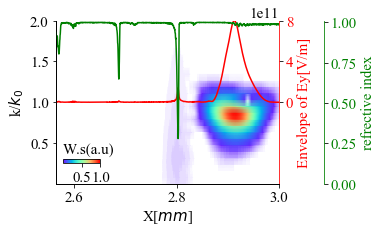

In [7]:
import matplotlib
import numpy as np
%matplotlib inline
from matplotlib import cm

####h
hx2 = fftpack.hilbert(x_ref)
hy2 = np.sqrt(x_ref**2+hx2**2)

####


####
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap
def reg_cmap():
    iname = 'rainbow'
    oname = 'dist'    
    low = 0.05        
    high = 1.0

    #(position, [r,g,b,a] or #rrggbb)
    special = [(0,[1,1,1,1])]      
    cmap = plt.get_cmap(iname)
    N = int((high - low) * 256)
    values = np.linspace(low,high,N)
    colors = cmap(values)
    colorlist = [(values[i],colors[i]) for i in range(N)]
    colorlist = special + colorlist
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    #An other example: plt.cm.colors.LinearSegmentedColormap.from_list(‘cmap’, [‘#FFFFFF’, ‘#98F5FF’, ‘#00FF00’, ‘#FFFF00’,’#FF0000’, ‘#8B0000’], 256)
    plt.cm.register_cmap(cmap=cmap)
    return cmap


def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        #'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6
####
####
matplotlib.rc('font', **font)


fig,ax=plt.subplots(figsize=(4,3))
ax2=ax.twinx()
ax3=ax.twinx()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(True)
ax3.spines['right'].set_visible(True)

###spines color
ax3.spines['right'].set_color('green')
ax2.spines['right'].set_color('red')
labels=ax2.get_yticklabels()+ax3.get_yticklabels()
for tl in ax2.get_yticklabels():
    tl.set_color('r')
for tic in ax3.get_yticklabels():
    tic.set_color('g')
###

ax3.spines['right'].set_position(('axes',1.2))#'data',690))


#ax.spines['right'].set_color('none')
k0=2*3.14/const.lamada
k1=2*3.14/1e-6
fs=2*3.14/const.delta_x/k0
f,t,zxx=signal.stft(Ey_y0,fs=2*3.14/const.delta_x,nperseg=400,noverlap=399)



plt.set_cmap(reg_cmap_transparent(color,create_alpha(lambda x:(np.exp(x/(256/5))-1.1))))
cmap = plt.get_cmap()

name='${e_k}$  '

d_x=n*10e-15*3e8*1e6-636

#cmap=reg_cmap()
cmap=reg_cmap()
ZZ=np.abs(zxx)/np.abs(zxx).max()
curve_cof= ax.pcolormesh((d_x+t*2*3.14/1e-6)*1e-3,f/k0,ZZ,cmap=cmap,shading='gouraud')
#ax=plt.gca()
#ax.set_xticks([200,400,600])#,fontdict=font)
#ax.set_xticklabels(['400','500','600'],fontdict=font)

d_x=n*10e-15*3e8*1e6*1e-3-636e-3

line2,= ax2.plot(np.linspace(d_x,d_x+60*10.6*1e-3,1908),hy, label="Ey", color='red')
line3,= ax3.plot(np.linspace(d_x,d_x+60*10.6*1e-3,1908),x_ref, label="ref", color='green')

#l1 = plt.legend([line2, line3], ["|Ey|", "ref"], loc='upper left')

###cbar and label
#position=fig.add_axes([0.72, 0.22, 0.13, 0.02])#位置[左,下,右,上]
position=fig.add_axes([0.15, 0.22, 0.13, 0.02])#位置[左,下,右,上]



cb=plt.colorbar(curve_cof,cax=position,orientation='horizontal')#方向
cb.ax.set_title('W.s(a.u)',fontdict=font,loc = 'left')#, fontdict=font)

curve_cof.set_clim((0.01,1))
###

ax.set_ylim((0,2))

ax2.set_ylim((-8e11,8e11))
ax3.set_ylim((0,1.01))

ax.set_xlim((d_x+200*1e-3,d_x+636*1e-3))

###set_ticks
ax.yaxis.set_ticks([0.5,1,1.5,2])
ax2.yaxis.set_ticks((0,4e11,8e11))
#ax2.yaxis.set_ticks([0.5,1,1.5,2])
#ax3.yaxis.set_ticks([0.5,1,1.5,2])

###
####
for tic in ax3.get_yticklabels():
    tic.set_color('g')
for tic in ax2.get_yticklabels():
    tic.set_color('r')
####label
ax.set_ylabel('k/${k_0}$',fontdict=font)
ax.set_xlabel('X'+ '[$mm$]')
ax2.set_ylabel('Envelope of Ey[V/m]',color='r')
ax3.set_ylabel('refrective index',color='g')
####

####no ticks####
##ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax2.set_yticklabels([])

#ax.set_ylabel("")
#ax2.set_ylabel("")
#ax3.set_ylabel("")
#ax.yaxis.set_ticklabels([])
#ax2.yaxis.set_ticklabels([])
#ax3.yaxis.set_ticklabels([])
#ax2.spines['right'].set_visible(True)
#ax3.spines['right'].set_visible(False)

################

####
plt.show()
fig.savefig('fig/'+str(n)+'_fig3b_new.png',dpi=400,bbox_inches = 'tight')

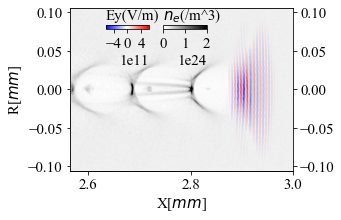

In [8]:
import matplotlib
import numpy as np
%matplotlib inline
from matplotlib import cm

####h


####
def reg_cmap_transparent(iname,alpha):
    oname = iname + '_transparent'
    cmap = plt.get_cmap(iname)
    values = np.linspace(0,1,256)
    colors = cmap(values)
    for i in range(256):
        colors[i][3] = alpha[i]
    colorlist = [(values[i],colors[i]) for i in range(256)]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list(oname,colorlist)
    plt.cm.register_cmap(cmap=cmap)
    return cmap

def create_alpha(func):
    return [ 1 if func(i)>1 else 0 if func(i)<0 else func(i) for i in range(256)]
font = {'family' : 'Times New Roman',
        #'color'  : 'black',  
        'weight' : 'normal',  
        'size'   : 15,  
        }  
color='rainbow'
index = 6
####
####
matplotlib.rc('font', **font)


fig,ax=plt.subplots(figsize=(4,3))
ax2=ax.twinx()
#ax3=ax.twinx()
ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
ax2.spines['top'].set_visible(True)
#ax3.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
#ax3.spines['right'].set_visible(False)

#ax3.spines['right'].set_position(('data',690))

####
plt.set_cmap(reg_cmap_transparent('bwr',create_alpha(lambda x:(1-abs(x/127.5-1)))))
cmap1 = plt.get_cmap()
plt.set_cmap(reg_cmap_transparent('binary',create_alpha(lambda x:(np.exp(x/(256))-1))))
cmap2 = plt.get_cmap()
name='${e_k}$  '
####

d_x=n*10e-15*3e8*1e3-636e-3
x=np.linspace(d_x,d_x+60*10.6*1e-3,1908)
r=np.linspace(-10*10.6*1e-3,10*10.6*1e-3,188)
X,R=np.meshgrid(x,r)

curve_cof= ax.pcolormesh(X,R,Ey.T,cmap=cm.bwr,shading='gouraud')
curve_temp= ax2.pcolormesh(X,R,ne.T,cmap=cmap2,shading='gouraud')
curve_cof.set_clim((-Ey.max()*0.8,Ey.max()*0.8))
curve_temp.set_clim((0,ne.max()*0.2))



position=fig.add_axes([0.25, 0.78, 0.15, 0.02])#位置[左,下,右,上]

cb=plt.colorbar(curve_cof,ticks=[-8e11,-4e11,0,4e11,8e11],cax=position,orientation='horizontal')#方向
#cb=plt.colorbar(curve_cof,ticks=[-8e11,-4e11,-2e11,0,2e11,4e11,8e11],cax=position,orientation='horizontal')#方向


#cb.set_label('Ey(V/m)',fontdict=font)
position2=fig.add_axes([0.45, 0.78, 0.15, 0.02])#位置[左,下,右,上]
#cb2=plt.colorbar(curve_temp,ticks=[0,4e23,8e23,1e24,2e24],cax=position2,orientation='horizontal')#方向
cb2=plt.colorbar(curve_temp,ticks=[0,1e24,2e24],cax=position2,orientation='horizontal')#方向


curve_temp.set_clim((0,2e24))

#cb2.set_label('n_e(/m^3)',fontdict=font)
cb.ax.set_title('Ey(V/m)',fontdict=font ,loc = 'left')
cb2.ax.set_title('${n_e}$(/m^3)',fontdict=font,loc = 'left')

###
ax.set_xlabel('X'+ '[$mm$]',fontdict=font)
ax.set_ylabel('R'+ '[$mm$]',fontdict=font)


#####no ticks####
#ax.set_xticklabels([])
#ax.set_yticklabels([])
#ax2.set_yticklabels([])
##ax.set_xlabel("")
#ax.set_ylabel("")



######
#ax2.set_ylabel('Intensity'+'W/${m^2}$',fontdict=font)

ax.set_xlim((d_x+200e-3,d_x+636e-3))
####
plt.show()
fig.savefig('fig/'+str(n)+'_fig3a_new.png',dpi=400,bbox_inches = 'tight')

In [13]:
d_x=n*10e-15*3e8
d_x

0.009

In [160]:
ne.shape

(1000, 188)

In [161]:
X.shape

(188, 1000)

In [162]:
R.shape

(188, 1000)

In [194]:
curve_load.get_label()

AttributeError: 'list' object has no attribute 'get_label'

In [215]:
line2

In [216]:
line3